In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
np.random.seed(1)
data_root = r'/content/drive/My Drive/data/hockey_players.csv'

In [4]:
df = pd.read_csv(data_root, encoding='latin-1', sep=',')
df.sample(5)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
4574,2012,LAT,9,bukarts roberts,F,L,183,88.0,1990-06-27,dinamo riga,21.845311,1990,26.277285
5272,2014,GER,2,reul denis,D,R,193,106.0,1989-06-29,adler mannheim,24.837782,1989,28.457140
3626,2010,DEN,33,jakobsen julian,F,L,183,82.0,1987-04-11,sodertalje sk,23.055441,1987,24.485652
3635,2010,DEN,84,hirsch peter,G,L,182,78.0,1979-03-06,coventry blaze,31.154004,1979,23.547881
3684,2010,FRA,42,lhenry fabrice,G,L,180,83.0,1972-06-29,rouen dragons,37.837098,1972,25.617284


In [5]:
df.duplicated().astype(np.int8).sum()

0

In [6]:
df.name.value_counts().sort_values(ascending=False)

masalskis edgars    12
green morten        12
nielsen daniel      11
madsen morten       11
holos jonas         11
                    ..
blake jason          1
nicoletti davide     1
sedin daniel         1
galvins guntis       1
nielsen daniel       1
Name: name, Length: 3278, dtype: int64

In [7]:
df[df.name == 'masalskis edgars']  # different values of height during player's career
# in 2004 - 175, then in 2016 again 175, between - 175 - 177, looks like some variance in measurements

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
1413,2004,LAT,32,masalskis edgars,G,L,175,78.0,1980-03-31,hk riga 2000,24.084873,1980,25.469388
2154,2006,LAT,31,masalskis edgars,G,L,176,78.0,1980-03-31,neftekhimik nizhnekamsk,26.083504,1980,25.180785
2571,2007,LAT,31,masalskis edgars,G,L,176,78.0,1980-03-31,latvia,27.082820,1980,25.180785
2968,2008,LAT,31,masalskis edgars,G,L,177,78.0,1980-03-31,metallurg zhlobin,28.084873,1980,24.897060
3391,2009,LAT,31,masalskis edgars,G,L,177,78.0,1980-03-31,ev duisburg,29.084189,1980,24.897060
3785,2010,LAT,31,masalskis edgars,G,L,177,78.0,1980-03-31,dinamo riga,30.083504,1980,24.897060
4154,2011,LAT,31,masalskis edgars,G,L,177,78.0,1980-03-31,yugra khanty-mansisk,31.082820,1980,24.897060
4578,2012,LAT,31,masalskis edgars,G,L,176,85.0,1980-03-31,yugra khanty-mansisk,32.084873,1980,27.440599
4949,2013,LAT,31,masalskis edgars,G,L,176,85.0,1980-03-31,yugra khanty-mansisk,33.084189,1980,27.440599
5369,2014,LAT,31,masalskis edgars,G,L,175,78.0,1980-03-31,hk poprad,34.083504,1980,25.469388


In [8]:
df.country.unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

In [9]:
countries = ['FIN', 'NOR', 'DEN']
# we will take mean value of height, as we do not know which measurement is the most accurate
samples = [df.loc[df.country == c, ['name', 'height']].groupby('name').agg({'height': 'mean'})['height'].values for c in countries]

In [10]:
[yi.mean() for yi in samples]  # there is some difference

[184.361125, 182.765736077981, 184.2507488302943]

In [11]:
# F-statistic
def statistic(*y: list) -> float:
    yc = np.concatenate(y)
    SS_b = sum([yg.shape[0] * np.power((yg.mean() - yc.mean()), 2) for yg in y])
    SS_w = sum(np.power((yi - yi.mean()), 2).sum() for yi in y)
    k1, k2 = len(y) - 1, yc.shape[0] - len(y)
    sigma_b, sigma_w = SS_b / k1, SS_w / k2
    return sigma_b / sigma_w

In [12]:
F = statistic(*samples)
F

3.5572896265895504

In [13]:
k = len(samples)
n = np.concatenate([*samples]).shape[0]

k1 = k - 1
k2 = n - k

In [14]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0168482792459144

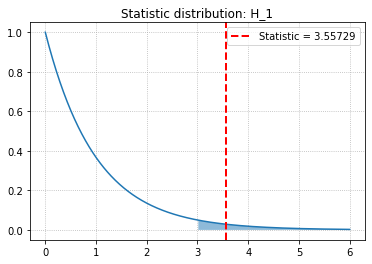

In [15]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.title(f'Statistic distribution: {"H_0" if F <= t else "H_1"}')
plt.axvline(F, ls='dashed', lw=2, c='r', label=f'Statistic = {F:.5f}')
plt.fill_between(ox_right, oy_right, alpha=0.5)
plt.legend(loc='upper right')
plt.grid(ls='dotted')
plt.show()

In [16]:
p_value = 1 - stats.f.cdf(F, dfn=k1, dfd=k2)  # for one-sided critical area
p_value

0.029364190203441387

In [17]:
1 if p_value < alpha else 0  # ANSWER

1

In [18]:
stats.f_oneway(*samples) # check the answer

F_onewayResult(statistic=3.557289626589626, pvalue=0.029364190203438802)

Таким образом, нулевая гипотеза о равенстве среднего роста по трем выборкам отбрасываается в пользу альтернативной гипотезы о наличии статистической значимости в средних значениях выборок. Отличие роста игороков из рассматриваемых стран является статистически значимым, при установленном уровне значимости $0.05$ ответ: 1

In [19]:
# BMI
samples = [df.loc[df.country == c, ['name', 'bmi']].groupby('name').agg({'bmi': 'mean'})['bmi'].values for c in countries]

In [20]:
[yi.mean() for yi in samples]  # there are some small difference

[25.947272800622656, 25.754549965425593, 25.371768467344744]

In [21]:
F = statistic(*samples)
F

7.253102169187219

In [22]:
# same as for previous case
k = len(samples)
n = np.concatenate([*samples]).shape[0]

k1 = k - 1
k2 = n - k

In [23]:
# same as for previous case
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0168482792459144

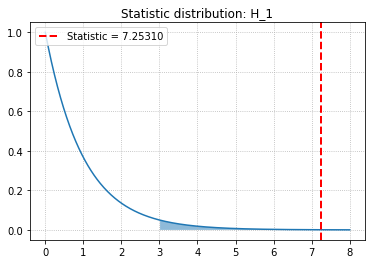

In [24]:
ox = np.linspace(0, 8, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 8, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.title(f'Statistic distribution: {"H_0" if F <= t else "H_1"}')
plt.axvline(F, ls='dashed', lw=2, c='r', label=f'Statistic = {F:.5f}')
plt.fill_between(ox_right, oy_right, alpha=0.5)
plt.legend(loc='upper left')
plt.grid(ls='dotted')
plt.show()

In [25]:
p_value = 1 - stats.f.cdf(F, dfn=k1, dfd=k2)  # for one-sided critical area
p_value

0.0007986236735616492

In [26]:
1 if p_value < alpha else 0  # ANSWER

1

In [27]:
stats.f_oneway(*samples) # check the answer

F_onewayResult(statistic=7.2531021691872954, pvalue=0.0007986236735615981)

Значит разница между индексами массы тела игроков также являются статистически значимыми при устанолвенном уровне значимости $0.05$.

К уроку уже приложено решение, значения статистик не совпадают с найденными здесь. Полагаю это связано с выбором способа учета уникальности имен игороков: здесь - среднее значение за карьеру, в решении - не указано.

Попробуем посчитать иначе

In [28]:
# as taking mean of bmi is not rather correct, we will try to take the latest value, as if years for player occur in ascending order
samples = [df.loc[df.country == c, ['name', 'bmi']].groupby('name').agg(lambda x: x.bmi.iloc[-1])['bmi'].values for c in countries]

In [29]:
[yi.mean() for yi in samples]

[25.948082381435807, 25.84454256708045, 25.437554156321017]

In [30]:
F = statistic(*samples)
F

5.532919076049722

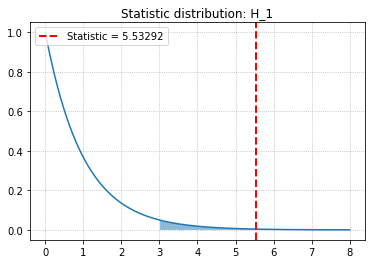

In [31]:
ox = np.linspace(0, 8, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 8, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.title(f'Statistic distribution: {"H_0" if F <= t else "H_1"}')
plt.axvline(F, ls='dashed', lw=2, c='r', label=f'Statistic = {F:.5f}')
plt.fill_between(ox_right, oy_right, alpha=0.5)
plt.legend(loc='upper left')
plt.grid(ls='dotted')
plt.show()

In [32]:
stats.f_oneway(*samples)  # got the same answer - H_1 is true, answer: 1

F_onewayResult(statistic=5.532919076049785, pvalue=0.004243187723739065)